<h1> Economic Recession Impact Analysis </h1>

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')


In [ ]:
# Installing Fred API

!pip install fredapi

<h3> 1. Web Scraping

In [ ]:
from fredapi import Fred

In [ ]:
fred_key = '09072c295cce82c66592fdfa0d8a0820 '

In [ ]:
fred = Fred(api_key = fred_key)
fred

In [ ]:
# Searching the data

df= fred.search('S&P', order_by = 'popularity')

In [ ]:
df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-11-10,2023-11-10,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-11-08,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-09 08:07:01-06:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-11-10,2023-11-10,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-10-31 08:12:01-05:00,88,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-11-10,2023-11-10,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-11-08,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-09 08:07:09-06:00,83,This data represents the effective yield of th...
SP500,SP500,2023-11-10,2023-11-10,S&P 500,2013-11-11,2023-11-09,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-11-09 19:10:57-06:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-11-10,2023-11-10,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,81,Household data are collected as of March. As ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDEM01ECA156NWDB,DDEM01ECA156NWDB,2023-11-10,2023-11-10,Stock Market Turnover Ratio (Value Traded/Capi...,1995-01-01,2000-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-08-04 09:48:42-05:00,3,Total value of shares traded during the period...
DDEM01JOA156NWDB,DDEM01JOA156NWDB,2023-11-10,2023-11-10,Stock Market Turnover Ratio (Value Traded/Capi...,2007-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-08-04 09:48:41-05:00,3,Total value of shares traded during the period...
DDEM01TZA156NWDB,DDEM01TZA156NWDB,2023-11-10,2023-11-10,Stock Market Turnover Ratio (Value Traded/Capi...,1999-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:28:50-05:00,3,Total value of shares traded during the period...


<Axes: >

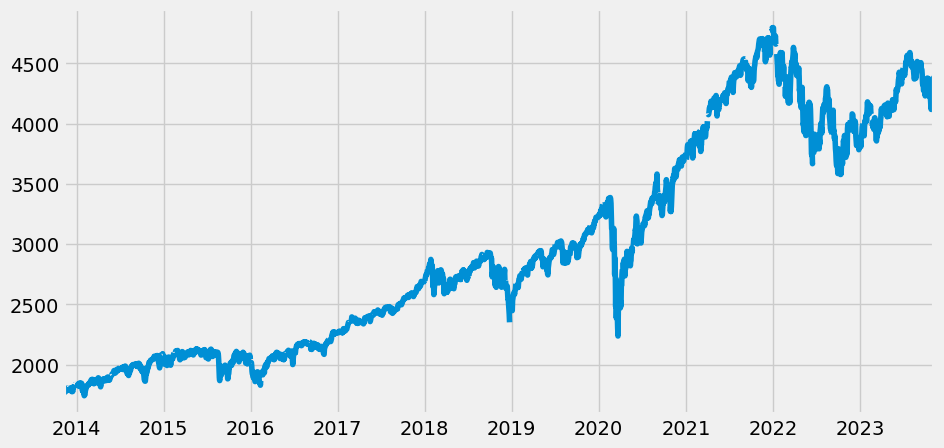

In [ ]:
#Extracting data of S&P 500

sp500 = fred.get_series(series_id = 'SP500')
sp500.plot(figsize=(10,5))

<h3> 2. Data Pre-processing

In [ ]:
# Extracting the unemployment rate data

unrate = fred.get_series('UNRATE')
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-06-01    3.6
2023-07-01    3.5
2023-08-01    3.8
2023-09-01    3.8
2023-10-01    3.9
Length: 910, dtype: float64

In [ ]:
# Querying to get the unemployment rate

unemp_df = fred.search('unemployment rate state',filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [ ]:
unemp_df = unemp_df.loc[unemp_df['id'].str.contains('UR')]
unemp_df.shape

(58, 15)

In [ ]:
# Creating a new table

all_results = []

for myid in unemp_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name=myid)
  all_results.append(results)
uemp_results = pd.concat(all_results, axis=1)
uemp_states = uemp_results.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[a] for a in uemp_states.columns]


In [ ]:
uemp_states

,California,Texas,New York,Florida,Alabama,Ohio,Michigan,Kentucky,Colorado,Minnesota,...,South Dakota,Wyoming,Vermont,New Hampshire,Midwest Census Region,South Census Region,Northeast Census Region,West Census Region,New England Census Division,the United States (DISCONTINUED)
2007-01-01,4.9,4.5,4.2,2.7,3.8,5.4,7.0,5.5,3.7,4.4,...,2.9,2.7,3.9,3.7,5.0,4.3,4.3,4.4,4.4,4.6
2007-02-01,5.0,4.4,4.2,2.8,3.8,5.5,6.9,5.4,3.5,4.4,...,2.9,2.6,3.9,3.7,5.0,4.2,4.3,4.4,4.4,4.5
2007-03-01,5.0,4.4,4.2,2.9,3.9,5.5,6.9,5.3,3.5,4.4,...,2.8,2.6,3.9,3.7,5.0,4.2,4.3,4.4,4.4,4.4
2007-04-01,5.1,4.3,4.3,3.0,3.9,5.5,6.9,5.3,3.4,4.4,...,2.8,2.6,3.9,3.6,5.0,4.2,4.3,4.5,4.4,4.5
2007-05-01,5.1,4.3,4.3,3.1,3.9,5.6,6.9,5.3,3.4,4.5,...,2.8,2.7,3.9,3.6,5.0,4.2,4.3,4.5,4.4,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-02-01,9.5,6.6,8.2,8.0,7.6,7.6,9.0,8.0,7.2,5.3,...,3.8,5.0,4.6,5.5,7.4,7.4,7.9,8.4,7.1,7.7
2013-03-01,9.4,6.5,8.1,7.9,7.5,7.6,8.9,8.0,7.1,5.2,...,3.8,4.9,4.6,5.5,7.4,7.3,7.8,8.3,7.1,7.6
2013-04-01,9.3,6.5,8.0,7.8,7.4,7.6,8.9,8.0,7.0,5.2,...,3.8,4.8,4.5,5.4,7.3,7.3,7.7,8.2,7.1,7.5
2013-05-01,9.2,6.4,7.9,7.6,7.3,7.6,8.8,8.0,6.9,5.1,...,3.8,4.7,4.5,5.3,7.3,7.2,7.6,8.1,7.0,7.6


<h3> 3. Data Analysis and Visualization

In [ ]:
# Unemployment rate of all the states

px.line(uemp_states)

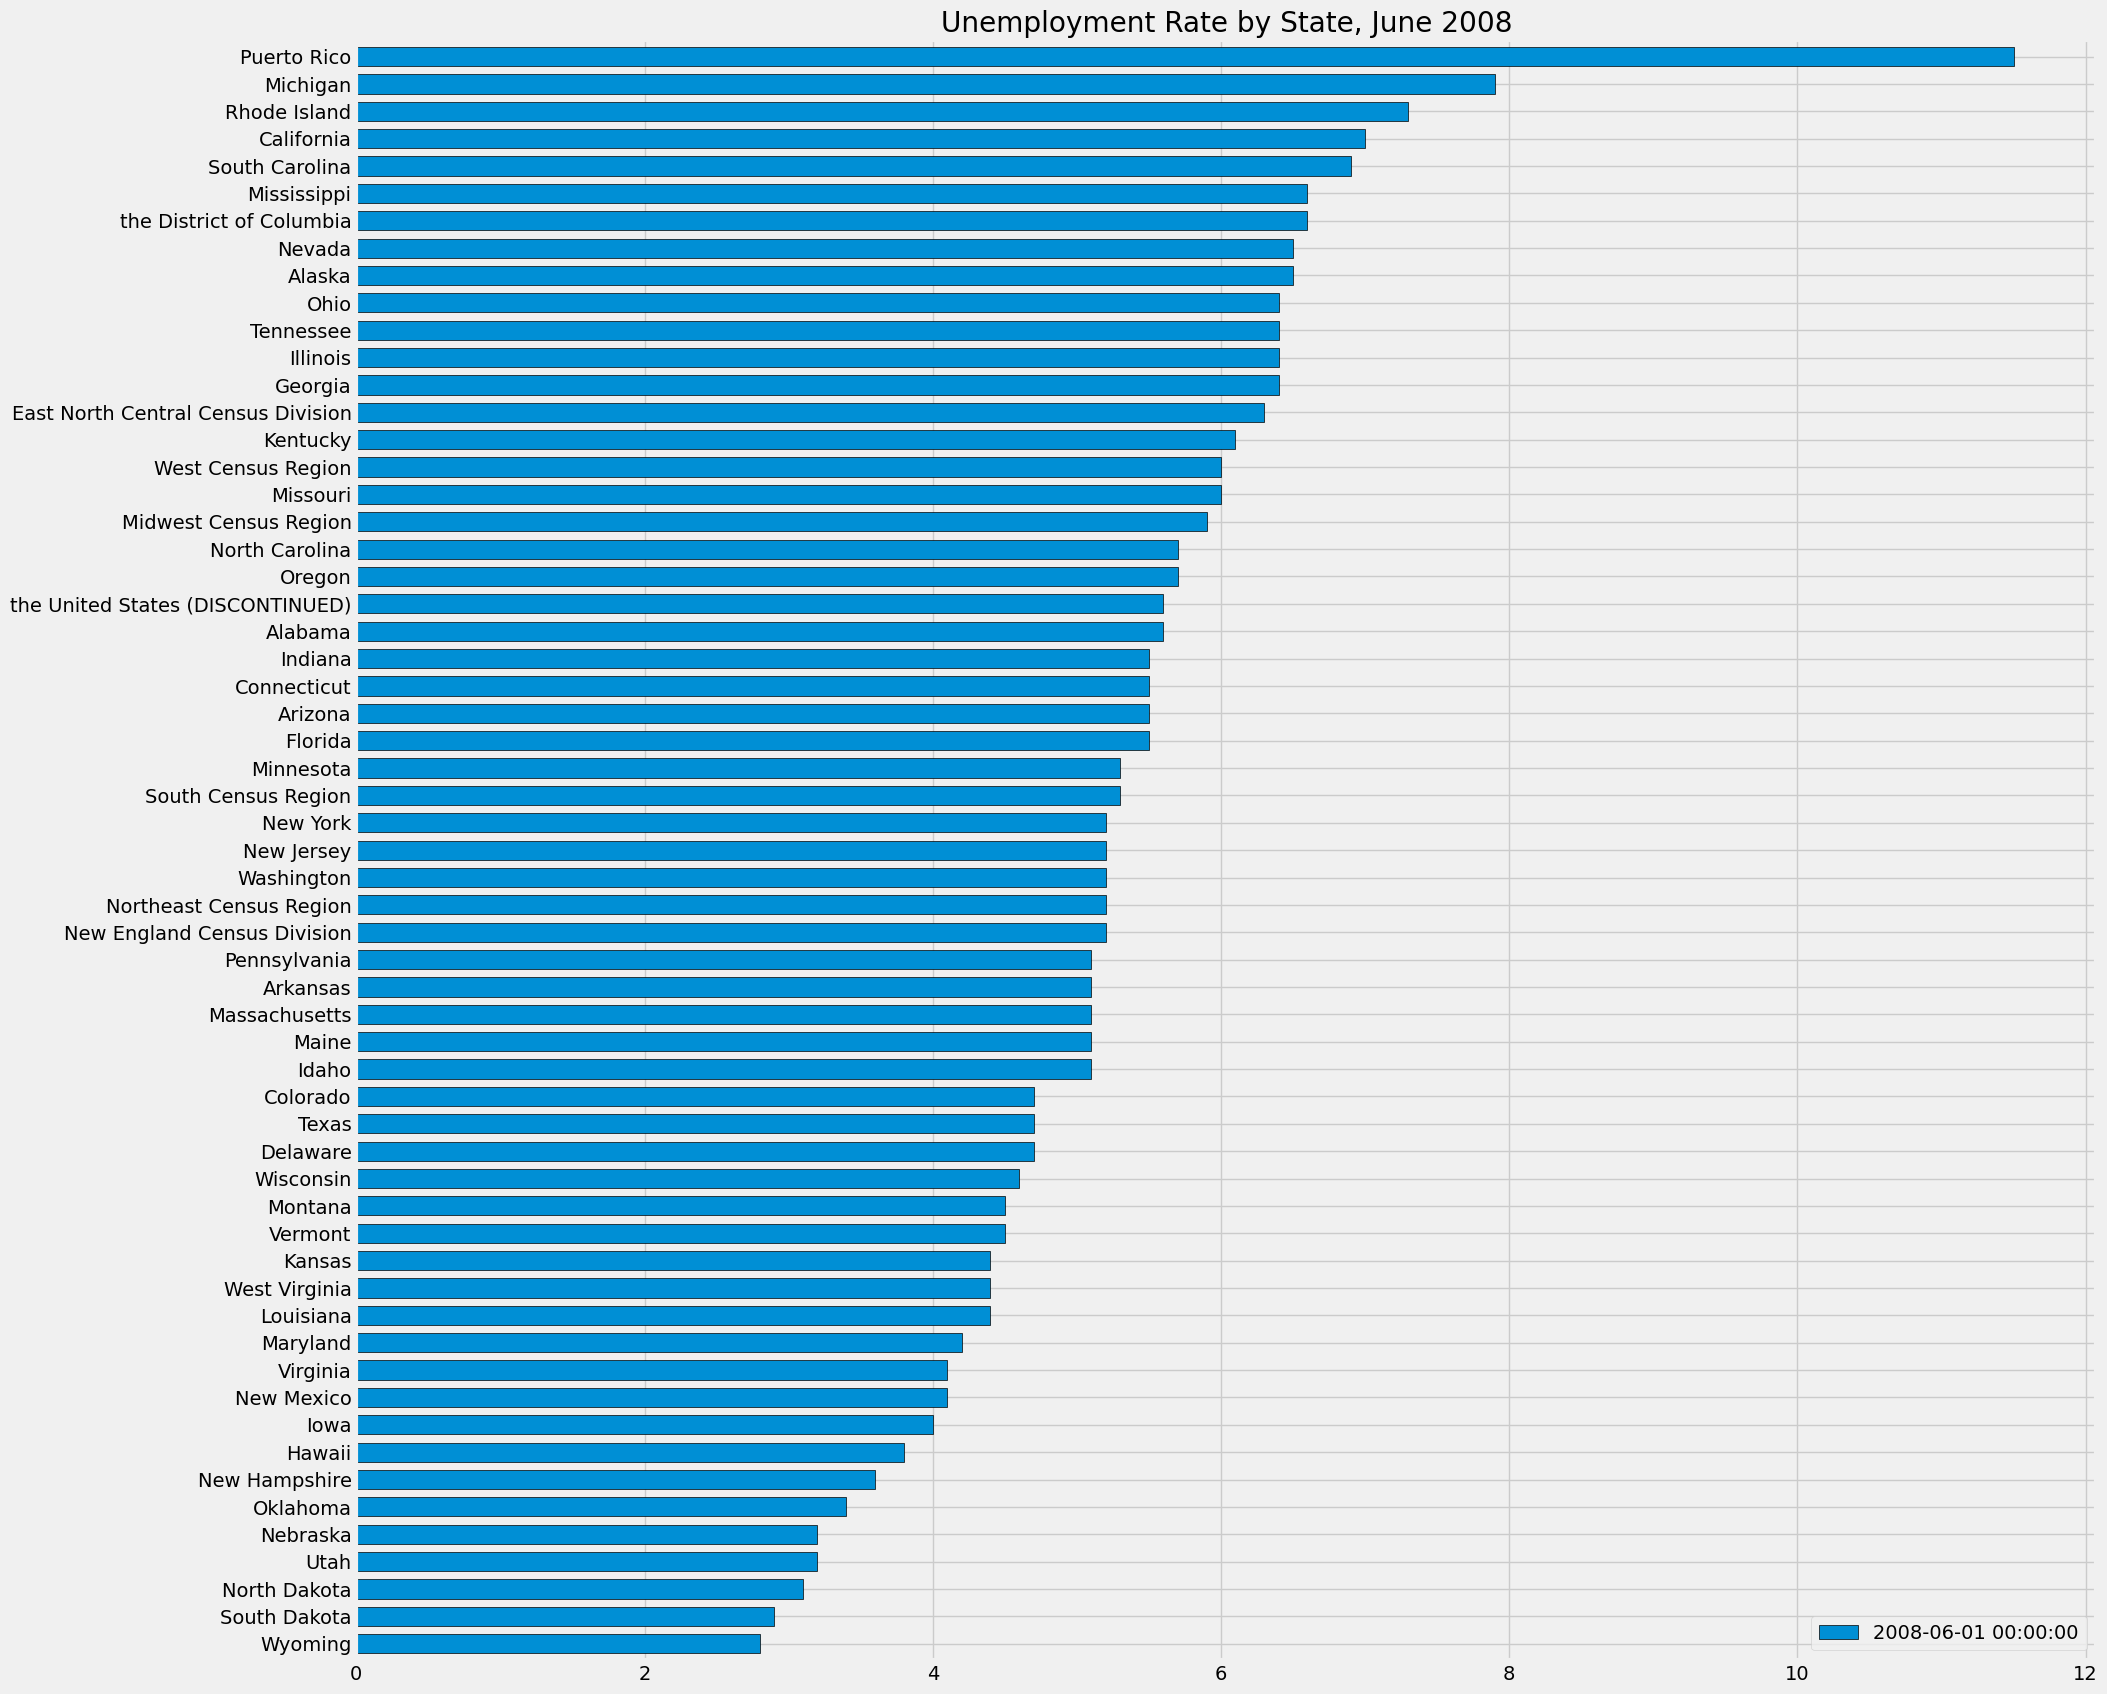

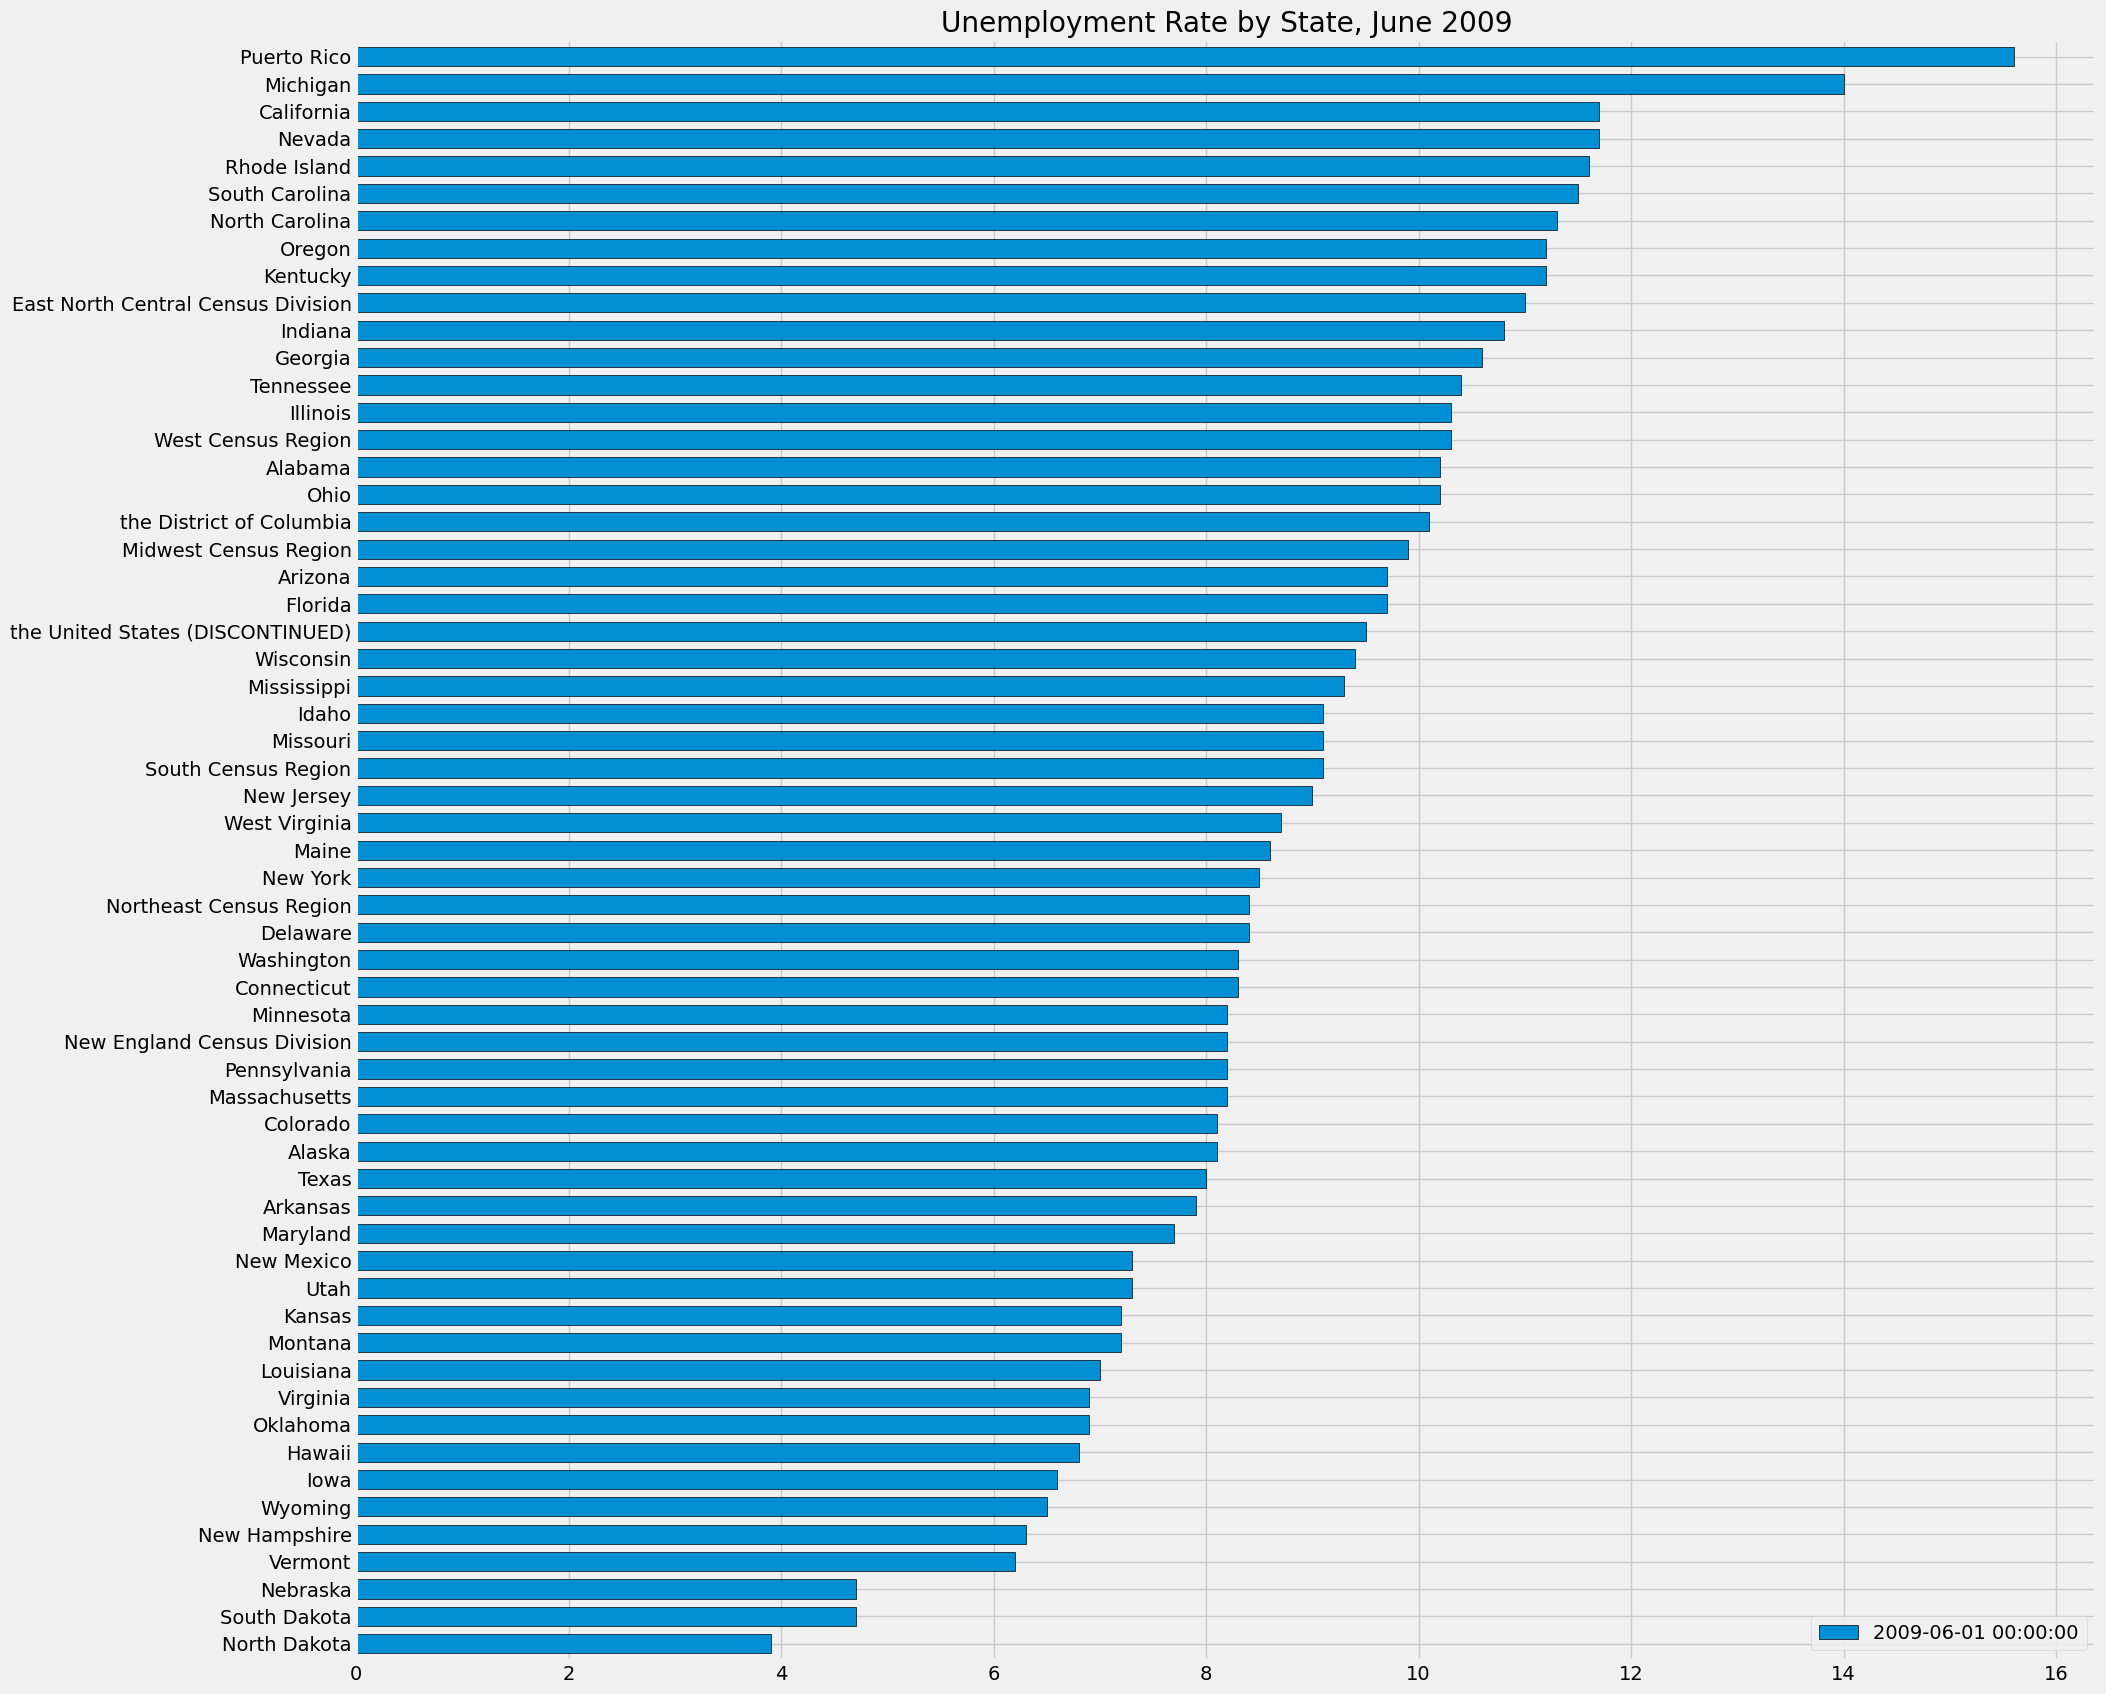

In [ ]:
# Plotting bar charts to compare the unemployment rate at the start and end of recession

ax= uemp_states.loc[uemp_states.index=='2008-06-01'].T.sort_values('2008-06-01')\
      .plot(kind='barh',figsize=(20,20),width = 0.7, edgecolor= 'black', title='Unemployment Rate by State, June 2008')

ax1 = uemp_states.loc[uemp_states.index=='2009-06-01'].T.sort_values('2009-06-01')\
      .plot(kind='barh',figsize=(20,20),width = 0.7, edgecolor= 'black', title='Unemployment Rate by State, June 2009')




In [ ]:
# Comparing with the help of tables

a1 = uemp_states.loc[uemp_states.index=='2008-06-01'].T.sort_values('2008-06-01').reset_index()
a2 = uemp_states.loc[uemp_states.index=='2009-06-01'].T.sort_values('2009-06-01').reset_index()


In [ ]:
a2

,index,2009-06-01 00:00:00
0,North Dakota,3.9
1,South Dakota,4.7
2,Nebraska,4.7
3,Vermont,6.2
4,New Hampshire,6.3
5,Wyoming,6.5
6,Iowa,6.6
7,Hawaii,6.8
8,Oklahoma,6.9
9,Virginia,6.9


In [ ]:
# Converting dataframes to csv

a1.to_csv()
a2.to_csv()

',index,2009-06-01 00:00:00\n0,North Dakota,3.9\n1,South Dakota,4.7\n2,Nebraska,4.7\n3,Vermont,6.2\n4,New Hampshire,6.3\n5,Wyoming,6.5\n6,Iowa,6.6\n7,Hawaii,6.8\n8,Oklahoma,6.9\n9,Virginia,6.9\n10,Louisiana,7.0\n11,Montana,7.2\n12,Kansas,7.2\n13,Utah,7.3\n14,New Mexico,7.3\n15,Maryland,7.7\n16,Arkansas,7.9\n17,Texas,8.0\n18,Alaska,8.1\n19,Colorado,8.1\n20,Massachusetts,8.2\n21,Pennsylvania,8.2\n22,New England Census Division,8.2\n23,Minnesota,8.2\n24,Connecticut,8.3\n25,Washington,8.3\n26,Delaware,8.4\n27,Northeast Census Region,8.4\n28,New York,8.5\n29,Maine,8.6\n30,West Virginia,8.7\n31,New Jersey,9.0\n32,South Census Region,9.1\n33,Missouri,9.1\n34,Idaho,9.1\n35,Mississippi,9.3\n36,Wisconsin,9.4\n37,the United States (DISCONTINUED),9.5\n38,Florida,9.7\n39,Arizona,9.7\n40,Midwest Census Region,9.9\n41,the District of Columbia,10.1\n42,Ohio,10.2\n43,Alabama,10.2\n44,West Census Region,10.3\n45,Illinois,10.3\n46,Tennessee,10.4\n47,Georgia,10.6\n48,Indiana,10.8\n49,East North Central Ce

In [ ]:
uemp_states.loc[uemp_states.index=='2008-06-01'].T.sort_values('2008-06-01').mean()

2008-06-01    5.282759
Freq: MS, dtype: float64

In [4]:
# From research, it was found that the unemployment rate on June 1 2020 was 5.70

# Therefore, the percent change would be:

unemp_2008 = 5.28
unemp_2020 = 5.70
percent_change = round(unemp_2020/unemp_2008,2)*100

print('Percent change = ',percent_change)

Percent change =  108.0
